### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import calendar

## Loading all the datasets

In [2]:
customers = pd.read_excel('dataset/CustomersData.xlsx')
discount_coupon = pd.read_csv('Dataset/Discount_Coupon.csv')
marketing_spend = pd.read_csv('Dataset/Marketing_Spend.csv')
online_sales = pd.read_csv('Dataset/Online_Sales.csv')
tax_amount = pd.read_excel('Dataset/Tax_amount.xlsx')

## Analysing Each Dataset
### 1. Customer Dataset

In [3]:
customers.shape

(1468, 4)

In [4]:
customers.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [6]:
customers.isna().sum()

CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64

In [7]:
customers[customers.duplicated()]

,CustomerID,Gender,Location,Tenure_Months


### 2. Discount Coupon Dataset

In [8]:
discount_coupon.shape

(204, 4)

In [9]:
discount_coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [10]:
discount_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [11]:
discount_coupon.isna().sum()

Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64

In [12]:
discount_coupon[discount_coupon.duplicated()]

,Month,Product_Category,Coupon_Code,Discount_pct


### 3. Marketing Spends Dataset

In [13]:
marketing_spend.shape

(365, 3)

In [14]:
marketing_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [15]:
marketing_spend.isna().sum()

Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

In [16]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


#### Since date column is in object datatype, convert it into datetime datatype

In [17]:
marketing_spend['Date'] = pd.to_datetime(marketing_spend['Date'])
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


### 4. Online Sales Dataset

In [18]:
online_sales.shape

(52924, 10)

In [19]:
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used


In [20]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


#### Since date column is in object datatype, convert it into datetime datatype 

In [21]:
online_sales['Transaction_Date']=pd.to_datetime(online_sales['Transaction_Date'])
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.0+ MB


In [22]:
online_sales.isna().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

In [23]:
online_sales[online_sales.duplicated()]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status


### 5. Tax Amount Dataset

In [24]:
tax_amount.shape

(20, 2)

In [25]:
tax_amount.head(2)

,Product_Category,GST
0,Nest-USA,0.1
1,Office,0.1


In [26]:
tax_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [27]:
tax_amount.isna().sum()

Product_Category    0
GST                 0
dtype: int64

In [28]:
tax_amount[tax_amount.duplicated()]

,Product_Category,GST


## Calculate Invoice

### Merge online_sales and tax_amount on Product_Category to get the GST amount of product category per transaction which can be used to calculate invoice

In [29]:
online_sales = pd.merge(online_sales,tax_amount,on='Product_Category',how='left')
online_sales['Month'] = online_sales['Transaction_Date'].dt.strftime('%b')
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan


In [30]:
discount_coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [31]:
online_sales = pd.merge(online_sales,discount_coupon[['Month','Product_Category','Discount_pct']],\
                        on=['Month','Product_Category'],how='left')
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,10.0
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,10.0


In [32]:
online_sales.loc[(online_sales['Month']=='Feb') & (online_sales['Product_Category']=='Apparel'),'Discount_pct']

4065    20.0
4066    20.0
4067    20.0
4068    20.0
4071    20.0
        ... 
7338    20.0
7339    20.0
7340    20.0
7345    20.0
7346    20.0
Name: Discount_pct, Length: 905, dtype: float64

### Handling NaN values in Discount_pct column

In [33]:
online_sales.isna().sum()

CustomerID               0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
GST                      0
Month                    0
Discount_pct           400
dtype: int64

In [34]:
online_sales[online_sales['Discount_pct'].isna()][:2]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Discount_pct
62,17850,16704,2019-01-01,GGOEYOBR078599,YouTube Luggage Tag,Fun,4,9.27,6.5,Used,0.18,Jan,NaN
95,14688,16742,2019-01-02,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,103.15,6.5,Clicked,0.10,Jan,NaN


#### Filling the nan values with 0, meaning no discount applies if not specified in the coupon table.


In [35]:
online_sales['Discount_pct']=online_sales['Discount_pct'].fillna(0)
online_sales.isna().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Month                  0
Discount_pct           0
dtype: int64

#### Convert discount_pct to decimal format

In [36]:
online_sales['Discount_pct']=online_sales['Discount_pct']/100
online_sales.Discount_pct.head(2)

0    0.1
1    0.1
Name: Discount_pct, dtype: float64

In [37]:
online_sales.Coupon_Status.unique()

array(['Used', 'Not Used', 'Clicked'], dtype=object)

In [38]:
def calculate_invoice(row):
    base_amount = row['Quantity']*row['Avg_Price']
    if row['Coupon_Status']=='Used':
        discount=base_amount*(row['Discount_pct'])
    else:
        discount=0
    gst = (base_amount-discount)*row['GST']
    return base_amount - discount + gst + row['Delivery_Charges']

In [39]:
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
month_order_short = [m[:3] for m in month_order]

In [40]:
online_sales['Invoice_Value'] = online_sales.apply(calculate_invoice,axis=1)
online_sales.iloc[:5]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Discount_pct,Invoice_Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,Jan,0.1,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,Jan,0.1,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,0.10,Jan,0.1,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,0.18,Jan,0.1,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,0.18,Jan,0.1,24.0230


# Business Questions

### <font color='Red'> 1. Identify the months with the highest and lowest acquisition count. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year </font>


#### Calculating acquisition month for each customerID

In [41]:
customers_acquisition_month = online_sales.groupby('CustomerID').apply(lambda x: x['Transaction_Date'].min().strftime("%B")).reset_index(name='Acquisition_Month')
customers_acquisition_month.head()

,CustomerID,Acquisition_Month
0,12346,September
1,12347,March
2,12348,June
3,12350,December
4,12356,September


In [42]:
month_acquisition_count = customers_acquisition_month.groupby('Acquisition_Month')['CustomerID'].nunique()\
.reindex(month_order).reset_index().rename(columns={'CustomerID':'Acquisition_Count','Acquisition_Month':'Month'})
month_acquisition_count

,Month,Acquisition_Count
0,January,215
1,February,96
2,March,177
3,April,163
4,May,112
5,June,137
6,July,94
7,August,135
8,September,78
9,October,87


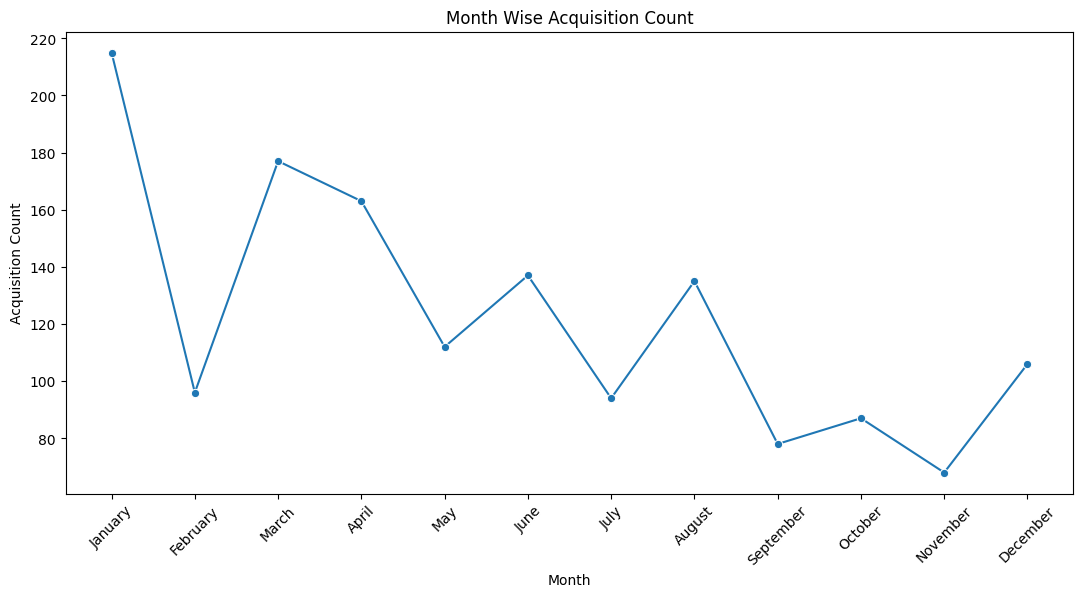

In [43]:
plt.figure(figsize=(13,6))
sns.lineplot(data=month_acquisition_count,x='Month',y='Acquisition_Count',marker='o')
plt.xticks(rotation=45)
plt.title('Month Wise Acquisition Count')
plt.xlabel('Month')
plt.ylabel("Acquisition Count")
plt.show()

### Conclusion:

By analyzing the line plot, we observe that **January** has the highest customer acquisition count. In contrast, **November** shows the lowest acquisition count. Acquisition is strong at the beginning of the year but drops heavily toward year-end.

---
#### Strategies to address the fluctuations and ensure consistent growth throughout the year:
1. Study the market campaigns ran in January or high acquisition months and apply similar strategies in weaker months like November.
2. For low acquisition months boost marketing and also introduce new-customer coupons.
3. Introduce always-on referral programs to smoothen seasonal dips
4. If online marketing brings more acquisition then reallocate offline in low-performing acquisition months




#### <font color="Red">2. Analyze the data to determine if certain months consistently show higher or lower monthly acquisitions. How can the company capitalize on high-performing months and improve performance during slower periods?</font>

**Ans: Recurring Patterns Or Anomalies:**
1. Strong Acquisition early in the year (January - April) Q1 - Strong
2. Weak Acquisition in the later months (September - November) Q4 - Weak
3. Summer months (june and august) sustain moderate acquisition
4. December despite being a holiday season, is moderate and not as high as january or spring months(march and april).

**Strategies to capitalise in high performing months**
1. Analyze marketing spends(online and offline spends) during January, march and april to identify what drives high acquisition and replicate them.
2. Strengthen retention programs for customers acquired in these peaks through loyalty benefits, referral incentives to extend growth momentum beyond Q1.

**Strategies to improve performance during slow periods**
1. Introduce targeted discounts, bundled offers, or referral drives in weak months like September–November.
2. Align marketing efforts with festival periods (e.g., Diwali, Navratri) during October–November to drive demand.
3. Reallocate part of the marketing budget from high-performing months to support low-performing ones, ensuring consistent acquisition growth.


#### <font color="Red">3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?
Monthly Retention rate = (Customers in Month X who returned in Month X+1) /  (total number of customers in month X)

In [44]:
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Discount_pct,Invoice_Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,Jan,0.1,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,Jan,0.1,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,0.10,Jan,0.1,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,0.18,Jan,0.1,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,0.18,Jan,0.1,24.0230


In [45]:
def calculate_month_wise_retention_rate(month_unique_cust):
    months = month_unique_cust.index
    retention_data = []
    for i in range(len(months)):
        current_month = months[i]
        if i < len(months)-1:
            next_month = months[i+1]
            current_customer = month_unique_cust[current_month]
            next_customer = month_unique_cust[next_month]
            retained = len(current_customer & next_customer)
            total_customers = len(current_customer)
            retention_rate = round((retained/total_customers)*100,2) if total_customers > 0 else 0
        else:
            retention_rate = np.nan
        retention_data.append({'Month': current_month, 'Retention_rate': None if pd.isna(retention_rate)\
                               else retention_rate})

    return pd.DataFrame(retention_data)

In [46]:
month_unique_cust = online_sales.groupby('Month')['CustomerID'].apply(set).reindex(month_order_short)
retention_data = calculate_month_wise_retention_rate(month_unique_cust)
retention_data

,Month,Retention_rate
0,Jan,6.05
1,Feb,10.09
2,Mar,11.54
3,Apr,11.16
4,May,18.50
5,Jun,22.39
6,Jul,27.54
7,Aug,14.67
8,Sep,15.03
9,Oct,14.76


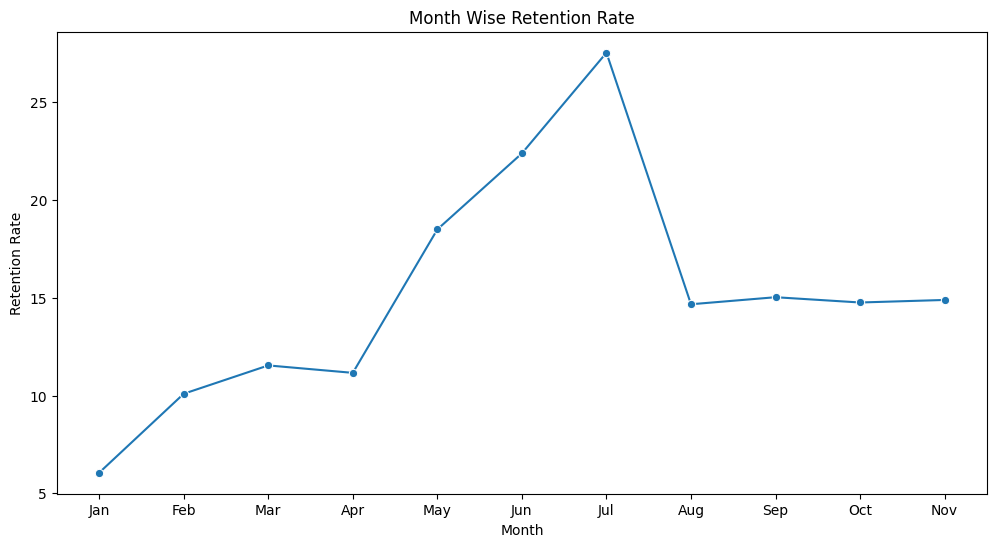

In [47]:
plt.figure(figsize=(12,6))
sns.lineplot(data=retention_data,x='Month',y='Retention_rate',marker='o')
plt.title('Month Wise Retention Rate')
plt.xlabel('Month')
plt.ylabel("Retention Rate")
plt.show()

### Retention Rate Analysis

- **Strongest Retention Periods:**  
  - **July (~28%)** – Peak retention.  
  - **May–June (18–23%)** – Strong upward trend leading to July.  

- **Weakest Retention Periods:**  
  - **January (~6%)** – Very low retention, poor carryover to February.  
  - **August–November (~15%)** – Significant drop after July, flat trend.  

### Strategies to Improve Retention
- **January (new customers):**  
  - Send reminders and follow-ups soon after first purchase.  
  - Offer small discounts or cashback on the second purchase.
- **August–November (drop period):**  
  - Run limited-time offers or bundles to spark interest.  
  - Highlight customer favorites or trending products in campaigns.  
  - Use email/SMS notifications to bring back inactive customers.

#### <font color='Red'>4. Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.
 </font>

In [48]:
strong_retention_months = online_sales[online_sales['Month'].isin(['May','Jun','Jul'])]
strong_retention_months.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Discount_pct,Invoice_Value
15843,15514,26840,2019-05-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,3,79.00,12.99,Used,0.10,May,0.2,221.55000
15844,15514,26842,2019-05-01,GGOEGAEB084513,BLM Sweatshirt,Apparel,1,33.59,6.00,Clicked,0.18,May,0.2,45.63620
15845,15514,26842,2019-05-01,GGOEGAEB084514,BLM Sweatshirt,Apparel,2,33.59,6.00,Used,0.18,May,0.2,69.41792
15846,15514,26843,2019-05-01,GGOEGAEB084516,BLM Sweatshirt,Apparel,1,33.59,6.00,Clicked,0.18,May,0.2,45.63620
15847,15514,26844,2019-05-01,GGOEGAEB084515,BLM Sweatshirt,Apparel,1,33.59,6.00,Used,0.18,May,0.2,37.70896


#### Top categories which attracted most of the customers in strong retention period

In [49]:
product_category_summary = strong_retention_months.groupby('Product_Category').agg(
    Unique_Customers=('CustomerID', 'nunique'),
    Avg_Invoice_Value=('Invoice_Value', 'mean'),
    Coupon_Usage_Rate=('Coupon_Status', lambda x: (x == 'Used').mean() * 100),
    Avg_Discount=('Discount_pct', lambda x: x.mean() * 100),
    Common_Discount=('Discount_pct', lambda x: x.mode()[0] * 100)
).reset_index()
product_category_summary.sort_values(by='Unique_Customers',ascending=False).head()

,Product_Category,Unique_Customers,Avg_Invoice_Value,Coupon_Usage_Rate,Avg_Discount,Common_Discount
2,Apparel,501,41.379775,33.046985,19.060309,10.0
15,Nest-USA,449,192.599931,33.281299,19.722135,10.0
17,Office,397,53.026683,33.842671,19.909451,20.0
6,Drinkware,306,73.490623,31.432039,19.283981,10.0
12,Lifestyle,277,36.065445,36.284153,18.765027,10.0


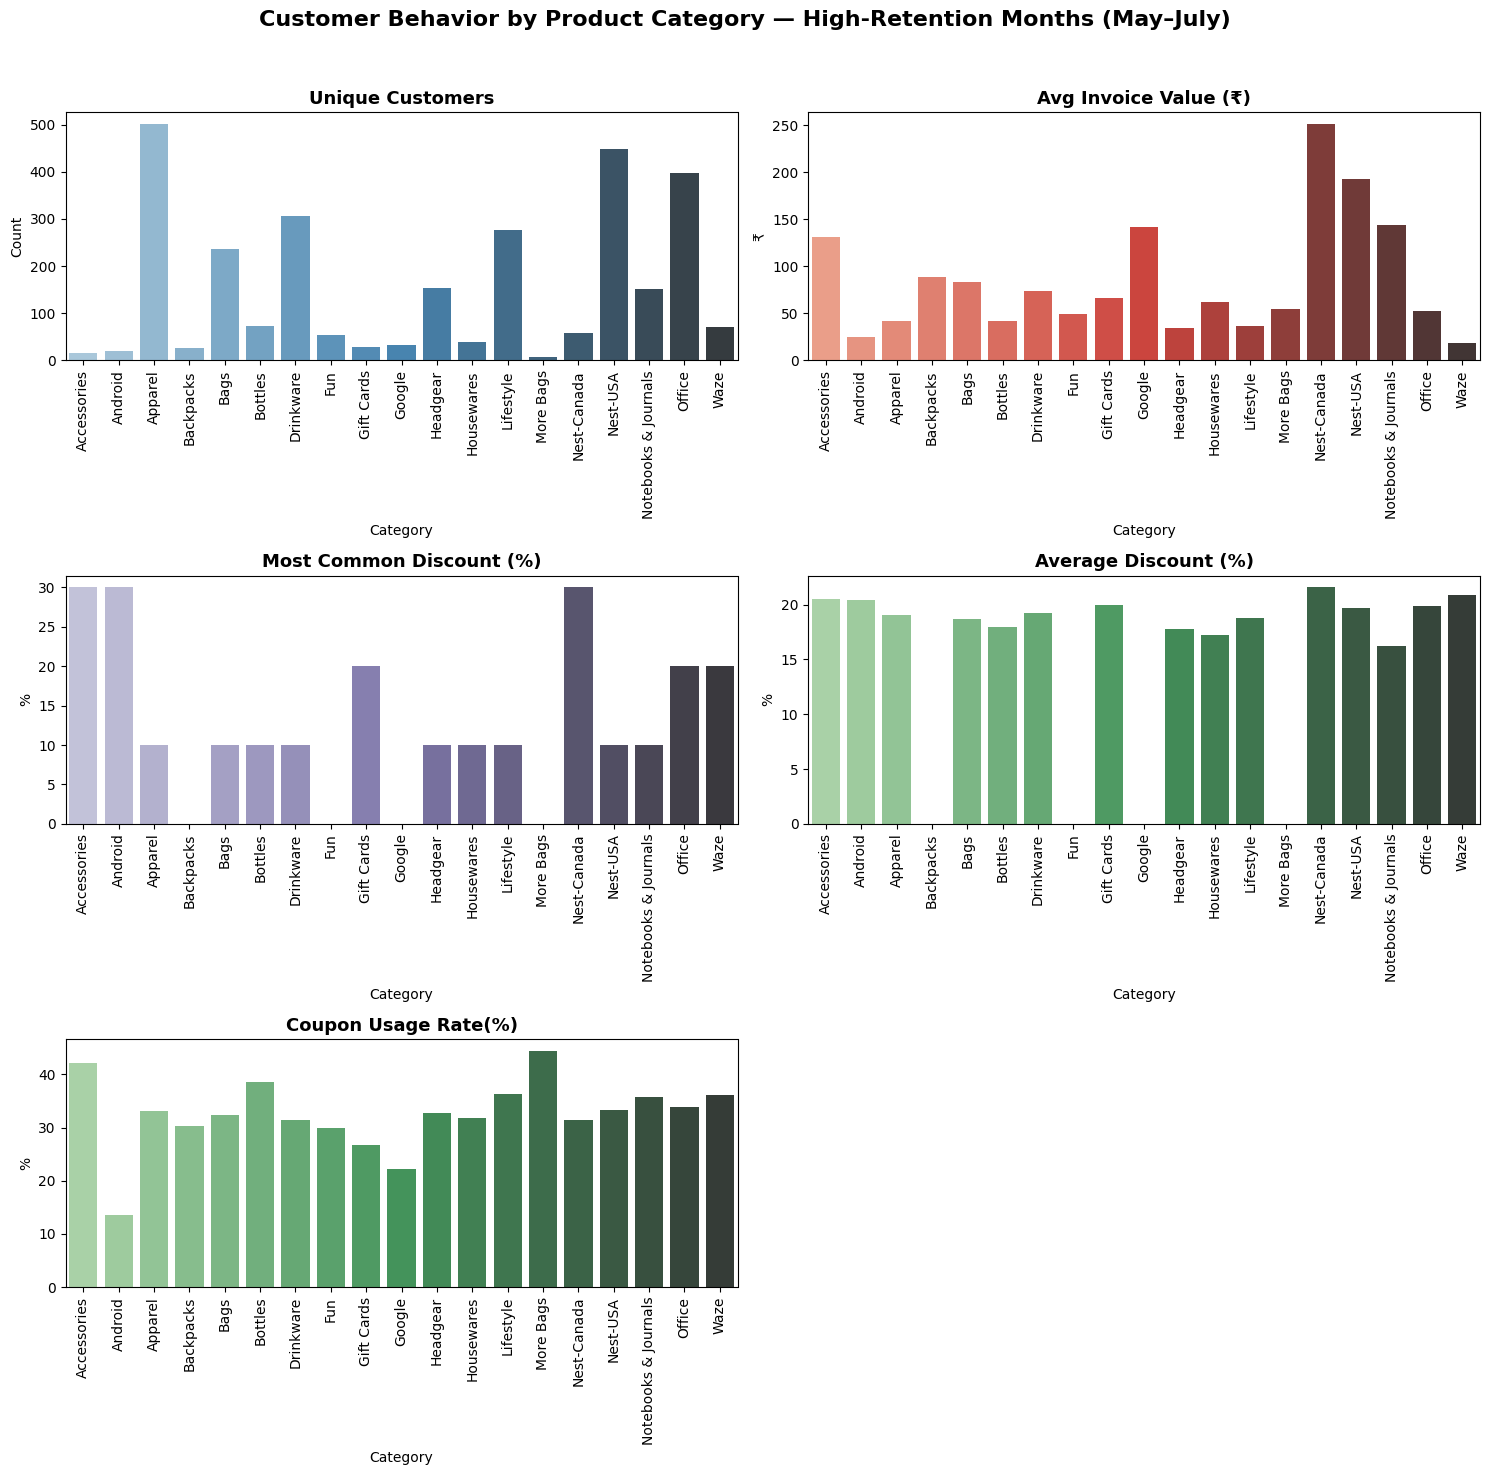

In [50]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))

# Plot 1: Unique Customers
sns.barplot(data=product_category_summary, x="Product_Category", y="Unique_Customers",
            palette="Blues_d", ax=axes[0,0])
axes[0,0].set_title("Unique Customers", fontsize=13, weight="bold")
axes[0,0].set_ylabel("Count")
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,0].set_xlabel("Category")

# Plot 2: Avg Invoice Value
sns.barplot(data=product_category_summary, x="Product_Category", y="Avg_Invoice_Value",
            palette="Reds_d", ax=axes[0,1])
axes[0,1].set_title("Avg Invoice Value (₹)", fontsize=13, weight="bold")
axes[0,1].set_ylabel("₹")
axes[0,1].tick_params(axis='x', rotation=90)
axes[0,1].set_xlabel("Category")

# Plot 3: Most Common Discount
sns.barplot(data=product_category_summary, x="Product_Category", y="Common_Discount",
            palette="Purples_d", ax=axes[1,0])
axes[1,0].set_title("Most Common Discount (%)", fontsize=13, weight="bold")
axes[1,0].set_ylabel("%")
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,0].set_xlabel("Category")

# Plot 4: Avg Discount
sns.barplot(data=product_category_summary, x="Product_Category", y="Avg_Discount",
            palette="Greens_d", ax=axes[1,1])
axes[1,1].set_title("Average Discount (%)", fontsize=13, weight="bold")
axes[1,1].set_ylabel("%")
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,1].set_xlabel("Category")

sns.barplot(data=product_category_summary, x="Product_Category", y="Coupon_Usage_Rate",
            palette="Greens_d", ax=axes[2,0])
axes[2,0].set_title("Coupon Usage Rate(%)", fontsize=13, weight="bold")
axes[2,0].set_ylabel("%")
axes[2,0].tick_params(axis='x', rotation=90)
axes[2,0].set_xlabel("Category")
axes[2,1].set_visible(False)
# Adjust layout
plt.suptitle("Customer Behavior by Product Category — High-Retention Months (May–July)",\
             fontsize=16, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Key Findings (May–July)
- **Top Categories:**  
  - *Apparel* → 501 customers, Avg. Invoice ₹41  
  - *Nest-USA* → 449 customers, Avg. Invoice ₹193  
  - *Office* → 397 customers, Avg. Invoice ₹53  

- **Discount Behavior:**  
  - Most common discounts: 10% (Apparel & Nest-USA), 20% (Office)  
  - Average discounts were higher (~19–20%), showing frequent elevated offers in addition to standard ones.  

- **Coupon Usage:** ~33% of transactions used coupons, steady across categories.  

- **Spending Behavior:**  
  - *Nest-USA* drove high-ticket orders.  
  - *Apparel* attracted the largest customer base.  
  - *Office* balanced between volume and spend.


---

### Strategies to Replicate Success Year-Round
1. **Promote Top 2–3 Categories Together:**  
   Bundle Apparel with Nest-USA or Office products to appeal to both price-sensitive and high-value customers.  

2. **Smart Discounting:**  
   - Use **10% discounts** as the anchor (customers’ expectation).  
   - Add **occasional 20% offers** to boost engagement. 

3. **Targeted Coupon Campaigns:**  
   Keep coupon usage around ~30–35% with personalized offers for new customers and loyalty rewards for repeat buyers.  

4. **Encourage Bigger Baskets:**  
   Cross-sell high-ticket items (Nest-USA) with volume drivers (Apparel, Office).  
   Offer free-shipping thresholds to push higher spend.  

5. **Seasonal Campaigns:**  
   Recreate mid-year momentum in weaker months through themed sales (Back-to-School in September, Festive offers in Oct–Nov).  


#### <font color='Red'>5. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts? </font>

In [51]:
customers_acquisition_month.head()

,CustomerID,Acquisition_Month
0,12346,September
1,12347,March
2,12348,June
3,12350,December
4,12356,September


In [52]:
online_sales['Month'] = online_sales['Transaction_Date'].dt.strftime('%B')
online_sales=pd.merge(online_sales,customers_acquisition_month,on='CustomerID',how='left')
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Discount_pct,Invoice_Value,Acquisition_Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,January,0.1,158.6729,January
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,January,0.1,158.6729,January


In [53]:
online_sales['Customer_Type']=online_sales.apply(lambda x:'New' if x['Month']==x['Acquisition_Month']\
                                                 else 'Existing',axis=1)
online_sales.Customer_Type.value_counts()

Customer_Type
New         32033
Existing    20891
Name: count, dtype: int64

In [54]:
online_sales['Month'] = pd.Categorical(online_sales["Month"], categories=month_order,ordered=True)
month_customer_revenue = online_sales.groupby(['Month','Customer_Type'])['Invoice_Value'].sum().reset_index()
month_customer_revenue

,Month,Customer_Type,Invoice_Value
0,January,Existing,0.00000
1,January,New,494090.54875
2,February,Existing,46524.59322
3,February,New,328637.45408
4,March,Existing,68930.24108
5,March,New,346227.54936
6,April,Existing,195985.88910
7,April,New,281512.70192
8,May,Existing,132338.74688
9,May,New,233257.28268


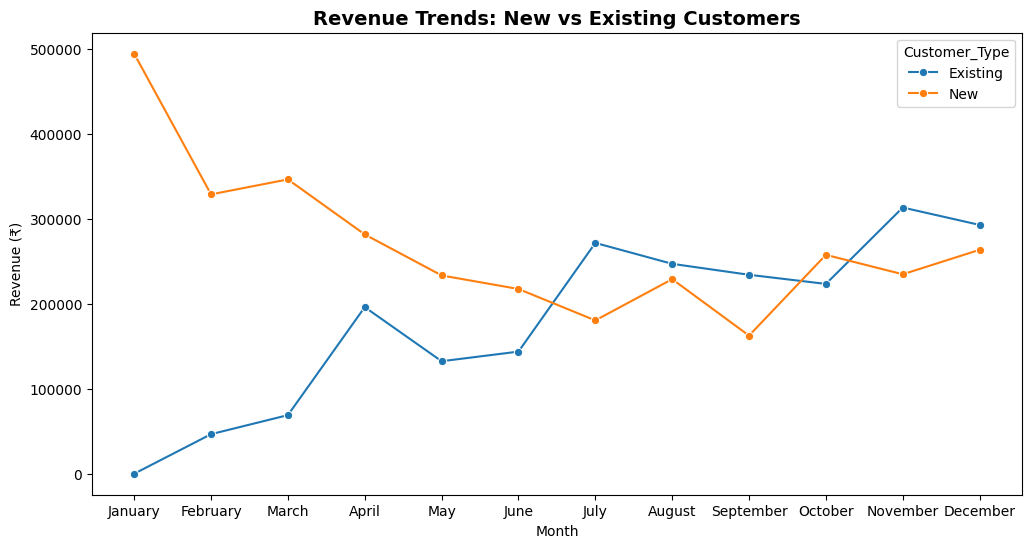

In [55]:
plt.figure(figsize=(12,6))
sns.lineplot(data=month_customer_revenue, x="Month", y="Invoice_Value", hue="Customer_Type", marker="o")
plt.title("Revenue Trends: New vs Existing Customers", fontsize=14, weight="bold")
plt.ylabel("Revenue (₹)")
plt.xlabel("Month")
plt.show()

### Observations
- **Early Year (Jan–Jun):** Revenue was driven mainly by **new customers**, showing strong acquisition campaigns.  
- **Mid-Year (Jul–Sep):** Revenue shifted towards **existing customers**, suggesting higher retention and repeat purchases.  
- **Year-End (Nov–Dec):** Existing customers again contributed more, showing loyalty during peak shopping periods.  

### Insights
- The business relied heavily on **acquisition** in the first half of the year.  
- In the second half, **retention became stronger**, with existing customers contributing more consistently to revenue.  
- This balance suggests that while acquisition brings in growth, **long-term stability is sustained by loyal customers**.  

### Implications for Strategy
1. **Early-Year Focus on Acquisition:** Keep driving new sign-ups and first purchases through promotions and awareness campaigns.  
2. **Mid-Year & Year-End Focus on Retention:** Leverage loyalty programs, targeted offers, and personalized engagement to maximize value from existing customers.  
3. **Balanced Approach:** Ensure acquisition and retention strategies complement each other — new customers must be nurtured into repeat buyers.  

**Summary:**  
New customers fueled growth in the first half, but existing customers became the backbone of revenue in the second half. This shows that acquisition drives short-term spikes, while retention ensures long-term revenue stability.


#### <font color='Red'>6. Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability? </font>

In [56]:
online_sales['Coupon_Applied'] = online_sales['Coupon_Status'].apply(lambda x:'Yes' if x == 'Used' else 'No')
online_sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Discount_pct,Invoice_Value,Acquisition_Month,Customer_Type,Coupon_Applied
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,January,0.1,158.6729,January,New,Yes
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,January,0.1,158.6729,January,New,Yes


In [57]:
revenue_share = online_sales.groupby('Coupon_Applied')['Invoice_Value'].sum().reset_index()
Invoice_Value = online_sales['Invoice_Value'].sum()
revenue_share['Revenue_Share'] = (revenue_share['Invoice_Value']/Invoice_Value)*100
revenue_share

,Coupon_Applied,Invoice_Value,Revenue_Share
0,No,3.823052e+06,70.831904
1,Yes,1.574307e+06,29.168096


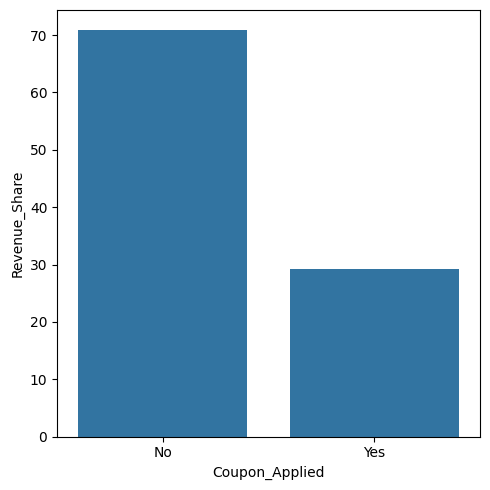

In [58]:
plt.figure(figsize=(5,5))
sns.barplot(data = revenue_share,x='Coupon_Applied',y='Revenue_Share')
plt.tight_layout()

## Relationship Between Coupon Usage and Revenue Generation

### Findings
- **Non-Coupon Transactions:** Contributed ~71% of total revenue, showing strong natural demand without discounts.  
- **Coupon Transactions:** Contributed ~29% of revenue, even after discounts were applied — proving coupons are effective at driving purchase volume.  

### Insights
- Coupons play a significant role in **boosting sales and conversions**, especially for price-sensitive customers.  
- However, the majority of revenue comes from **non-coupon sales**, which are more profitable since margins remain intact.  
- This suggests that while coupons are useful, **overuse would reduce profitability without adding proportional revenue gains**.  

### Strategies to Optimize Discounts
1. **Targeted Coupons:**  
   - Focus discounts on **new customers** to encourage first purchases and **inactive customers** to re-engage.  
   - Avoid offering large discounts to loyal customers who already purchase without coupons.  

2. **Tiered Discounting:**  
   - Small discounts (5–10%) for lower basket sizes.  
   - Larger discounts (15–20%) only for bigger orders — encouraging higher spend while protecting margins.  

3. **Seasonal & Event-Based Coupons:**  
   - Concentrate coupon campaigns during weaker months (Sep–Nov) or festive sales.  
   - Rely on natural demand during strong months (Jan–Jul, Dec).  

4. **Leverage "Clicked but Not Used" Segment:**  
   - Customers who showed interest in discounts but purchased without them are **profitable but price-aware**.  
   - Send them **occasional light offers** (e.g., 5–10%) to increase conversion without eroding margins.  

---

### **Summary**
Coupon usage drives nearly one-third of revenue and is an effective acquisition tool, but most revenue (71%) still comes from full-price sales.  
The optimal strategy is to use **coupons selectively (targeted, tiered, and seasonal)** — ensuring they drive incremental sales while keeping profitability intact.


#### <font color='Red'>7. Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies? </font>

In [59]:
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Discount_pct,Invoice_Value,Acquisition_Month,Customer_Type,Coupon_Applied
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,January,0.1,158.6729,January,New,Yes
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,January,0.1,158.6729,January,New,Yes
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,0.10,January,0.1,8.5295,January,New,Yes
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,0.18,January,0.1,109.9270,January,New,No
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,0.18,January,0.1,24.0230,January,New,Yes


In [60]:
product_summary = online_sales.groupby('Product_SKU').agg({'Quantity':'sum','Invoice_Value':'sum'})\
                    .rename(columns={'Quantity':'Total_Quantity','Invoice_Value':'Total_Revenue'}).reset_index()
product_summary.head()

,Product_SKU,Total_Quantity,Total_Revenue
0,GGOEA0CH077599,515,7929.94495
1,GGOEAAAB034813,22,464.43500
2,GGOEAAAB034814,57,951.88288
3,GGOEAAAB034815,41,1072.71678
4,GGOEAAAB034816,24,620.99992


##### Filtering out top 10% products from both total_quantity sold and revenue generated

In [61]:
high_quantity=product_summary['Total_Quantity']>product_summary['Total_Quantity'].quantile(0.90)
high_revenue=product_summary['Total_Revenue']>product_summary['Total_Revenue'].quantile(0.90)
top_performers = product_summary[high_quantity & high_revenue]
top_performers = pd.merge(top_performers,online_sales[['Product_SKU','Product_Description','Product_Category']]\
                          ,on='Product_SKU',how='left').drop_duplicates()
top_performers.sort_values(by=['Total_Revenue','Total_Quantity'],ascending=False,inplace=True)
top_performers.head(5)

,Product_SKU,Total_Quantity,Total_Revenue,Product_Description,Product_Category
17982,GGOENEBJ079499,4570,731870.6912,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA
21493,GGOENEBQ078999,5206,671620.0665,Nest Cam Outdoor Security Camera - USA,Nest-USA
14359,GGOENEBB078899,4402,567867.4926,Nest Cam Indoor Security Camera - USA,Nest-USA
24821,GGOENEBQ079099,2683,229033.0425,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA
26182,GGOENEBQ079199,2670,225275.9108,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA


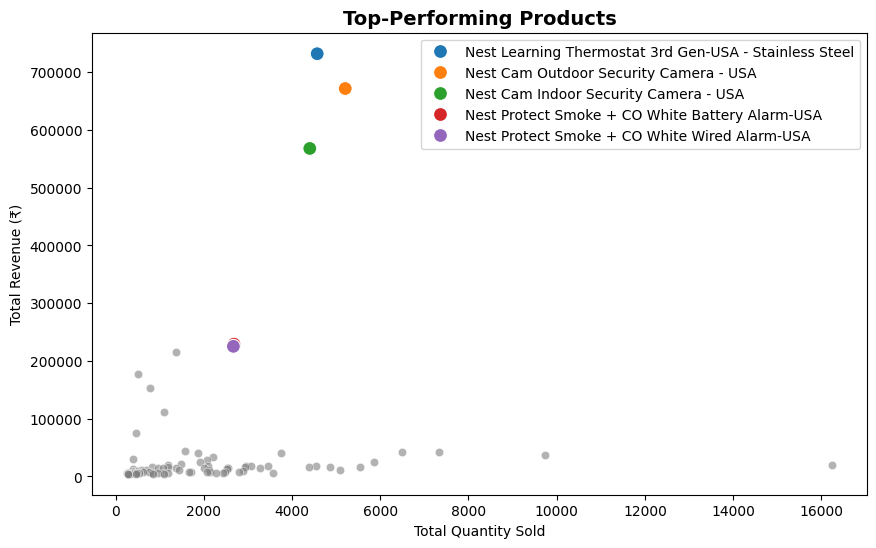

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=top_performers, x="Total_Quantity", y="Total_Revenue", color="gray", alpha=0.6)

# Highlight top performers
sns.scatterplot(data=top_performers.iloc[:5], x="Total_Quantity", y="Total_Revenue",\
                hue='Product_Description', color="red", s=100)

plt.title("Top-Performing Products", fontsize=14, weight="bold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Total Revenue (₹)")
plt.legend()
plt.show()

## Top 5 Products – Why They Are Successful

1. **Nest Thermostat (Stainless Steel)**  
   - Brings the most revenue (₹7.3L).  
   - **Why?** Saves energy, premium product, trusted brand.  

2. **Nest Cam Outdoor**  
   - Sold the most units (5,206, ₹6.7L).  
   - **Why?** People want outdoor security; seen as essential.  

3. **Nest Cam Indoor**  
   - 4,402 units, ₹5.7L revenue.  
   - **Why?** Affordable entry into home security; easy for any household.  

4. **Nest Protect Smoke Alarm (Battery)**  
   - 2,683 units, ₹2.3L revenue.  
   - **Why?** Safety product, simple battery installation → wide adoption.  

5. **Nest Protect Smoke Alarm (Wired)**  
   - 2,670 units, ₹2.25L revenue.  
   - **Why?** Suits permanent setups (new homes, renovations).  

---

### Common Reasons for Success
- **High-demand category:** Smart home and security devices are growing fast.  
- **Trusted brand:** Google Nest has strong customer trust.  
- **Choice of options:** Variants (battery vs wired, thermostat colors) attract different buyers.  
- **Clear value:** Energy savings and safety make customers willing to pay more.  


### Inventory Management
- **Keep higher stock** of Thermostats and Cams → they bring the most revenue and units.  
- **Balance inventory** for Protect (Battery & Wired) → both are equally popular, so stock both variants.  
- **Plan ahead for demand peaks** (e.g., festive season, year-end sales) to avoid stockouts.  

### Promotional Strategies
- **Thermostats:** Highlight premium features, use **light discounts (5–10%)** since demand is already strong.
- **Cams (Indoor & Outdoor):** Bundle with Protect alarms for smart home/security kits.  
- **Protect (Battery & Wired):** Market as **essential safety devices**; run targeted safety campaigns.  

---

**Summary:**  
Stock more of high-demand Nest devices (Thermostats, Cams, Protect) and avoid deep discounts on them. Instead, use **bundles and light, targeted offers** to drive higher basket size and repeat purchases while protecting margins.


#### <font color='Red'>8. Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI? </font>

In [63]:
marketing_spend['Month']=marketing_spend['Date'].dt.strftime('%B')
marketing_spend['Month']=pd.Categorical(marketing_spend["Month"], categories=month_order)
month_marketing_spend = marketing_spend.groupby('Month').apply(lambda x: x['Offline_Spend']\
                                .sum()+x['Online_Spend'].sum()).reset_index(name='Total_Spend')
month_marketing_spend

,Month,Total_Spend
0,January,154928.95
1,February,137107.92
2,March,122250.09
3,April,157026.83
4,May,118259.64
5,June,134318.14
6,July,120217.85
7,August,142904.15
8,September,135514.54
9,October,151224.65


In [64]:
month_total_revenue = online_sales.groupby('Month')['Invoice_Value'].apply(lambda x:round(x.sum(),2))\
                                                        .reset_index(name='Total_Revenue')
month_total_revenue

,Month,Total_Revenue
0,January,494090.55
1,February,375162.05
2,March,415157.79
3,April,477498.59
4,May,365596.03
5,June,361000.17
6,July,451878.41
7,August,475796.88
8,September,396510.49
9,October,480767.37


In [65]:
month_revenue_marketing_spend = pd.merge(month_total_revenue,month_marketing_spend,on='Month')
month_revenue_marketing_spend['ROI'] = ((month_revenue_marketing_spend['Total_Revenue']-\
                                          month_revenue_marketing_spend['Total_Spend'])/\
                                          month_revenue_marketing_spend['Total_Spend'])*100
month_revenue_marketing_spend

,Month,Total_Revenue,Total_Spend,ROI
0,January,494090.55,154928.95,218.914283
1,February,375162.05,137107.92,173.625368
2,March,415157.79,122250.09,239.597124
3,April,477498.59,157026.83,204.087263
4,May,365596.03,118259.64,209.146916
5,June,361000.17,134318.14,168.765016
6,July,451878.41,120217.85,275.882957
7,August,475796.88,142904.15,232.948259
8,September,396510.49,135514.54,192.596270
9,October,480767.37,151224.65,217.916008


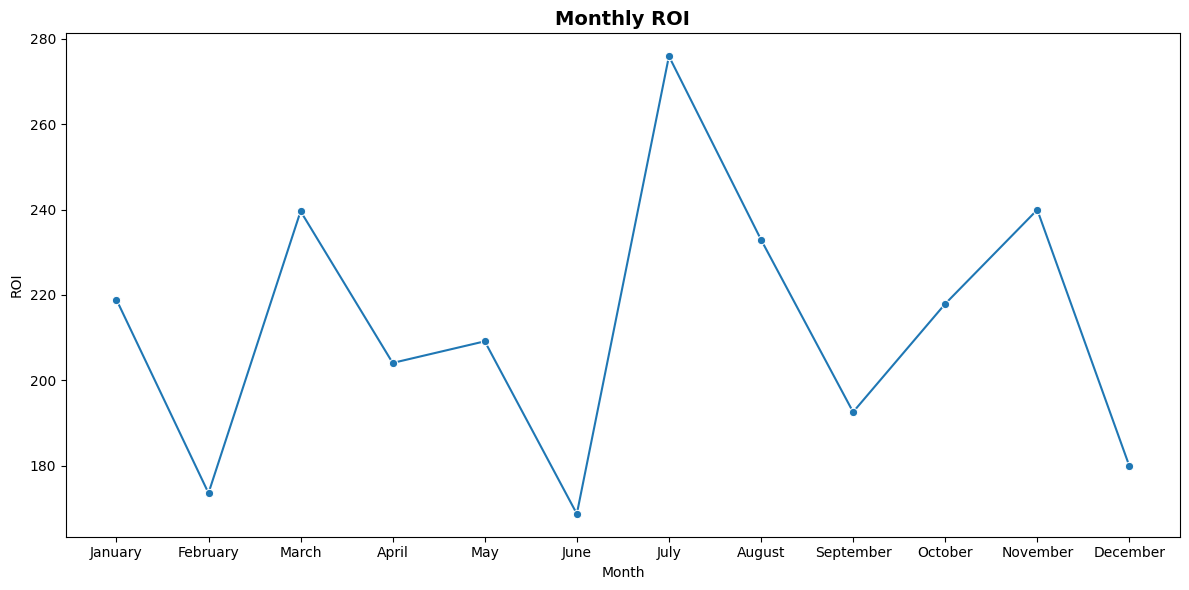

In [66]:
plt.figure(figsize=(12,6))
sns.lineplot(data=month_revenue_marketing_spend, x="Month", y="ROI", marker="o")
plt.title("Monthly ROI", fontsize=14, weight="bold")
plt.ylabel("ROI")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


### Findings
- **Highest ROI months:** July (276), November (240), March (240), August (233)  
  → Marketing spend was very efficient — strong returns for every ₹1 invested.  

- **Lowest ROI months:** June (169), February (174), December (180)  
  → Spend was less effective; December in particular had high revenue but poor efficiency due to heavy spend.  

### Strategies to Improve ROI
1. **Reallocate budget** → Invest more in high ROI months (Jul, Nov, Mar, Aug) where marketing clearly works better.  
2. **Optimize weak months** → In Jun, Feb, Dec, use low-cost channels (email, retargeting) and focus on repeat customers instead of broad campaigns.  
3. **Leverage natural demand** → In December, reduce spend since festive sales already drive revenue organically.  
4. **Link campaigns to products** → Push proven high-demand Nest products in weak ROI months to improve efficiency.  

---

**Summary:**  
Shift more spend to efficient months, cut back or optimize campaigns in low ROI months, and avoid overspending in December when natural demand is high.


#### <font color='Red'>9. Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results? </font>

In [67]:
month_revenue_marketing_spend['Marketing_Spend%'] = \
            (month_revenue_marketing_spend['Total_Spend']*100)/month_revenue_marketing_spend['Total_Revenue']
month_revenue_marketing_spend

,Month,Total_Revenue,Total_Spend,ROI,Marketing_Spend%
0,January,494090.55,154928.95,218.914283,31.356388
1,February,375162.05,137107.92,173.625368,36.546319
2,March,415157.79,122250.09,239.597124,29.446657
3,April,477498.59,157026.83,204.087263,32.885297
4,May,365596.03,118259.64,209.146916,32.347080
5,June,361000.17,134318.14,168.765016,37.207223
6,July,451878.41,120217.85,275.882957,26.604026
7,August,475796.88,142904.15,232.948259,30.034697
8,September,396510.49,135514.54,192.596270,34.176786
9,October,480767.37,151224.65,217.916008,31.454849


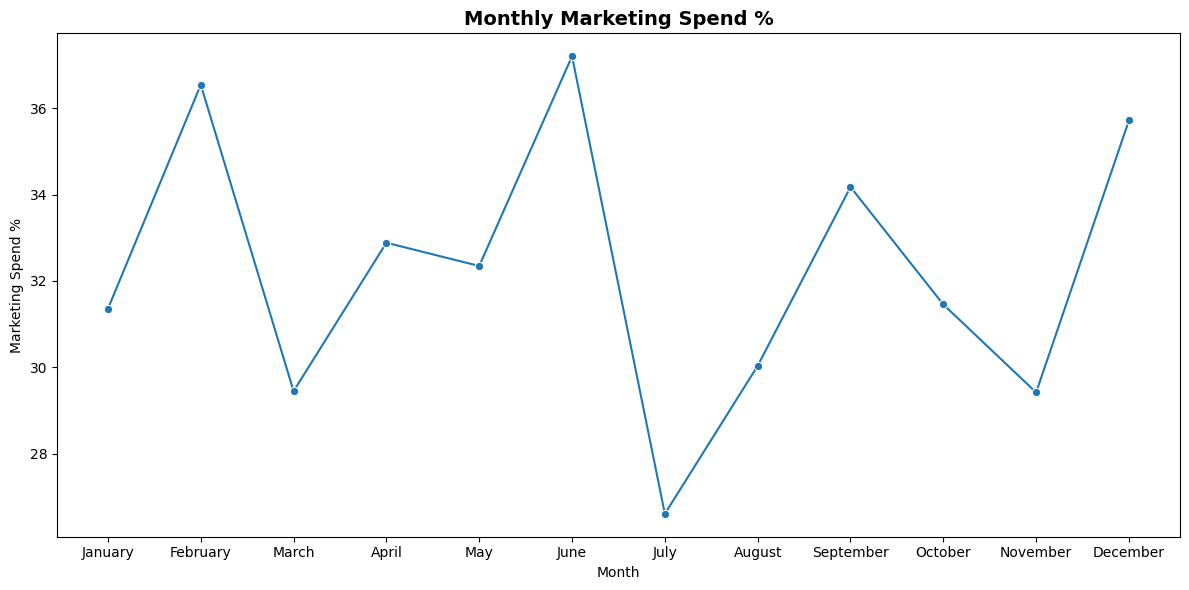

In [68]:
plt.figure(figsize=(12,6))
sns.lineplot(data=month_revenue_marketing_spend, x="Month", y="Marketing_Spend%", marker="o")
plt.title("Monthly Marketing Spend %", fontsize=14, weight="bold")
plt.ylabel("Marketing Spend %")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

### Findings
- **High-efficiency months (low spend %):** July (26.6%), March (29.4%), November (29.4%), August (30.0%) → marketing spend was lean yet delivered strong revenue.  
- **Low-efficiency months (high spend %):** June (37.2%), February (36.5%), December (35.7%) → a bigger share of revenue went into marketing, lowering efficiency.  

### Insights
- Efficient months prove that **smart targeting and optimized campaigns can achieve more with less spend**.  
- Inefficient months suggest **overspending** or campaigns not aligned with natural demand.  

### Strategies
1. **Reallocate budgets:** Use July, March, November, and August as benchmarks — allocate more funds to periods when campaigns show high ROI.  
2. **Apply best practices from high-efficiency months:** Replicate targeting, or promotions that worked well in those months.  
3. **Reduce spend in strong-demand months (e.g., December):** Customers buy anyway, so marketing can be lighter and more focused.  
4. **Set efficiency benchmarks:** Keep marketing spend near **30% of revenue** as a healthy target; review and optimize months above this level.
So, based on previous high efficiency months we can set efficiency benchmarks (in this case it is approx. 30%) in low efficiency months and reallocate resources to high efficiency months

#### <font color='Red'>10. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques) </font>

In [69]:
analysis_date = online_sales['Transaction_Date'].max() + pd.Timedelta(days=1)
analysis_date

Timestamp('2020-01-01 00:00:00')

In [70]:
customer_rfm = online_sales.groupby('CustomerID').agg(Recency = ('Transaction_Date', \
                    lambda x: (analysis_date - x.max()).days),Frequency = ('Transaction_ID', \
                    lambda x : x.nunique()),Monetary = ('Invoice_Value',lambda x: round(x.sum(),2))).reset_index()
customer_rfm.head(2)

,CustomerID,Recency,Frequency,Monetary
0,12346,108,1,174.98
1,12347,60,31,15686.84


In [71]:
recency_cutoff_points = customer_rfm['Recency'].quantile([0,0.25,0.5,0.75,1])
frequency_cutoff_points = customer_rfm['Frequency'].quantile([0,0.25,0.5,0.75,1])
monetary_cutoff_points = customer_rfm['Monetary'].quantile([0,0.25,0.5,0.75,1])
customer_rfm['R_Score'] = pd.cut(customer_rfm['Recency'],bins=recency_cutoff_points,\
                                 labels=[1,2,3,4],include_lowest=True)
customer_rfm['F_Score'] = pd.cut(customer_rfm['Frequency'],bins=frequency_cutoff_points,\
                                 labels=[1,2,3,4],include_lowest=True)
customer_rfm['M_Score'] = pd.cut(customer_rfm['Monetary'],bins=monetary_cutoff_points,\
                                 labels=[1,2,3,4],include_lowest=True)
customer_rfm['RFM_Score'] = customer_rfm.apply(lambda x: x['R_Score']+x['F_Score']+x['M_Score'],axis=1)
customer_rfm.head(2)

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,108,1,174.98,2,1,1,4.0
1,12347,60,31,15686.84,2,4,4,10.0


In [72]:
def classify_customer(score):
    if score <= 6:
        return 'Standard'
    elif score <= 9:
        return 'Silver'
    elif score <= 11:
        return 'Gold'
    else:
        return 'Premium'

In [73]:
customer_rfm['Segment']=customer_rfm['RFM_Score'].apply(classify_customer)
customer_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,108,1,174.98,2,1,1,4.0,Standard
1,12347,60,31,15686.84,2,4,4,10.0,Gold
2,12348,74,8,1689.56,2,2,2,6.0,Standard
3,12350,18,11,1467.44,1,2,2,5.0,Standard
4,12356,108,13,2007.43,2,3,2,7.0,Silver


In [74]:
segment_summary = customer_rfm.groupby('Segment').agg(Customer_Count=('CustomerID',lambda x: x.nunique()),Revenue_Share=('Monetary',lambda x: (x.sum()/customer_rfm['Monetary'].sum())*100)).reset_index()
segment_summary

,Segment,Customer_Count,Revenue_Share
0,Gold,227,30.541582
1,Premium,51,8.243216
2,Silver,644,53.991582
3,Standard,546,7.223620


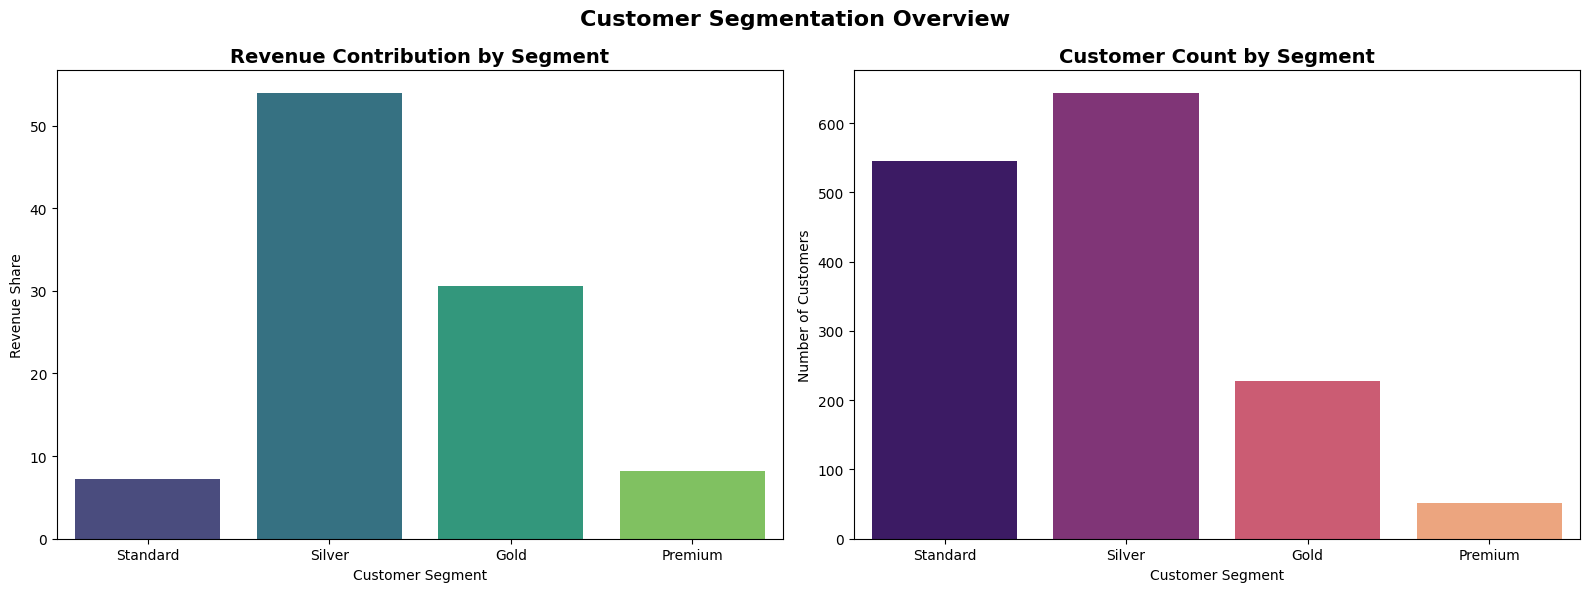

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Plot 1: Revenue Contribution (Barplot) ---
sns.barplot(
    data=segment_summary,
    x="Segment", y="Revenue_Share",
    order=["Standard","Silver","Gold","Premium"],
    palette="viridis", ax=axes[0],estimator=sum
)
axes[0].set_title("Revenue Contribution by Segment", fontsize=14, weight="bold")
axes[0].set_xlabel("Customer Segment")
axes[0].set_ylabel("Revenue Share")

# --- Plot 2: Customer Count (Barplot) ---
sns.barplot(
    data=segment_summary,
    x="Segment",y='Customer_Count',
    order=["Standard","Silver","Gold","Premium"],
    palette="magma", ax=axes[1]
)
axes[1].set_title("Customer Count by Segment", fontsize=14, weight="bold")
axes[1].set_xlabel("Customer Segment")
axes[1].set_ylabel("Number of Customers")

plt.suptitle("Customer Segmentation Overview", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()


## Targeted Strategies by Customer Segment

### 1. Silver (644 customers, 54% of revenue)
- **Profile:** Largest group, moderate spenders, big revenue driver.  
- **Strategies:**  
  - Introduce **loyalty programs** (points, cashback) to encourage repeat purchases.  
  - Provide **personalized product recommendations** to push them toward higher-value products.  
  - Target with **cross-sell bundles** (e.g., add-ons, accessories).  

---

### 2. Gold (227 customers, 31% of revenue)
- **Profile:** Smaller group but very valuable; frequent and high spenders.  
- **Strategies:**  
  - Offer **exclusive perks** (early access, premium support).  
  - Encourage **upselling** with premium product lines.  
  - Launch **referral incentives** to bring in new high-value customers.  

---

### 3. Premium (51 customers, 8% of revenue)
- **Profile:** Top-tier by engagement/score, but currently underperforming in revenue share.  
- **Strategies:**  
  - Build **VIP experiences** (dedicated relationship manager, invites to special events).  
  - Test **personalized high-value offers** to unlock more spend.  
  - Conduct **feedback sessions** to understand what prevents them from spending more.  

---

### 4. Standard (546 customers, 7% of revenue)
- **Profile:** Large group, low contribution to revenue.  
- **Strategies:**  
  - Use **low-cost channels** (email, push notifications) to re-engage.  
  - Send **welcome/educational campaigns** to convert them into active buyers.  
  - Run **win-back discounts** or trial offers to encourage repeat purchases.  


#### <font color='Red'> 11. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments? </font>

### Revenue Contribution by Segment

- **Silver (644 customers):** Largest group, contributes **54% of total revenue** → backbone of the business.  
- **Gold (227 customers):** Smaller in size, but contributes **31% of revenue** → highly valuable customers.  
- **Premium (51 customers):** Smallest group, only **8% of revenue** → underutilized potential.  
- **Standard (546 customers):** Large group, but only **7% of revenue** → low spenders.  

---

### Strategies

#### Focus on High-Value Segments (Silver + Gold, 85% of revenue)
- **Silver:**  
  - Build **loyalty programs** and cross-sell bundles to retain and upgrade them.  
  - Personalize offers to gradually move some into Gold.  
- **Gold:**  
  - Strengthen engagement with **exclusive perks, upsell campaigns, and referrals**.  
  - Protect this segment as they are reliable revenue drivers.  

#### Nurture Lower-Value Segments (Premium + Standard, 15% of revenue)
- **Premium:**  
  - Despite being “top-tier” in behavior, their spend is low.  
  - Provide **VIP experiences and personalized offers** to unlock hidden value.  
- **Standard:**  
  - Use **low-cost engagement (email, push notifications)**.  
  - Run **trial offers and educational campaigns** to convert them into active buyers.  

#### <font color='Red'> 12. Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts? </font>

In [76]:
online_sales['Acquisition_Month'] = pd.Categorical(online_sales["Acquisition_Month"], categories=month_order)
cohort_customers= online_sales.groupby('Acquisition_Month')['CustomerID'].apply(set)\
                .reset_index().rename(columns={'Acquisition_Month': 'Cohort_Month', 'CustomerID':'CustomerIDs'})
cohort_customers

,Cohort_Month,CustomerIDs
0,January,"{17920, 14849, 15363, 17924, 17925, 17412, 174..."
1,February,"{13831, 15880, 16905, 16393, 15373, 13838, 158..."
2,March,"{16898, 14850, 13319, 12808, 14344, 15882, 169..."
3,April,"{16385, 17411, 15881, 16907, 13327, 14866, 143..."
4,May,"{15361, 16899, 13324, 17937, 14871, 16923, 169..."
5,June,"{13829, 13317, 15366, 17913, 15379, 13846, 128..."
6,July,"{13313, 16424, 17457, 13368, 13397, 12377, 123..."
7,August,"{15370, 16395, 13862, 14889, 15939, 12359, 133..."
8,September,"{17418, 16912, 16401, 12820, 13859, 15395, 148..."
9,October,"{16387, 14341, 13837, 14368, 16943, 14389, 128..."


In [77]:
def calculate_cohort_subsequent_months_retention_rate(cohort_customers,month_unique_cust):
    current_cohort = cohort_customers['Cohort_Month'] 
    cohort_total_customers = len(cohort_customers['CustomerIDs'])
    subsequent_months = month_unique_cust[month_unique_cust['Month']>current_cohort]
    retention_data = {'Cohort_Month':current_cohort}
    for index,row in subsequent_months.iterrows():
        retention_rate = \
        round((len(row['CustomerID'] & cohort_customers['CustomerIDs'])/cohort_total_customers)*100,2)
        retention_data[row['Month']]=retention_rate
    return retention_data

In [78]:
month_unique_cust = online_sales.groupby('Month')['CustomerID'].apply(set).reset_index()
month_unique_cust

,Month,CustomerID
0,January,"{17920, 14849, 15363, 17924, 17925, 17412, 174..."
1,February,"{13831, 15880, 16905, 16393, 15373, 13838, 158..."
2,March,"{17920, 16898, 14850, 13319, 12808, 14344, 158..."
3,April,"{16385, 16898, 17411, 13319, 15881, 16907, 133..."
4,May,"{15361, 16899, 16393, 15881, 13324, 17404, 179..."
5,June,"{14849, 17412, 13829, 13317, 15366, 14344, 153..."
6,July,"{13313, 17924, 13319, 15373, 13329, 15379, 174..."
7,August,"{15370, 16395, 13842, 14867, 17428, 16923, 128..."
8,September,"{16904, 17418, 17419, 16395, 16912, 16401, 153..."
9,October,"{14849, 16387, 14341, 13837, 15373, 12829, 138..."


In [79]:
retention_matrix = pd.DataFrame(cohort_customers.apply(calculate_cohort_subsequent_months_retention_rate,\
                                    axis=1,args=(month_unique_cust,)).to_list()).set_index('Cohort_Month')
retention_matrix

,February,March,April,May,June,July,August,September,October,November,December
Cohort_Month,,,,,,,,,,,
January,6.05,11.16,15.81,10.70,20.47,16.28,21.86,10.70,13.02,9.30,15.81
February,NaN,7.29,9.38,16.67,17.71,22.92,19.79,15.62,12.50,11.46,16.67
March,NaN,NaN,10.17,19.77,14.12,18.08,18.64,12.43,12.43,8.47,10.73
April,NaN,NaN,NaN,8.59,14.72,14.72,11.04,9.20,6.13,9.82,7.36
May,NaN,NaN,NaN,NaN,10.71,8.04,11.61,8.93,11.61,12.50,7.14
June,NaN,NaN,NaN,NaN,NaN,14.60,16.06,8.76,8.03,10.22,8.03
July,NaN,NaN,NaN,NaN,NaN,NaN,13.83,4.26,6.38,11.70,9.57
August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.37,11.11,7.41,5.93
September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.69,3.85,2.56


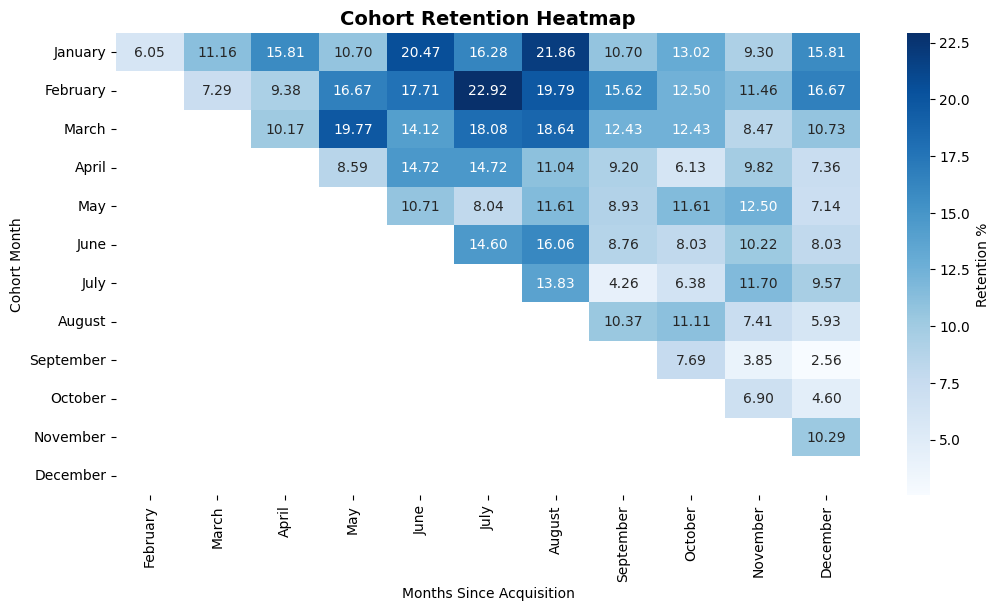

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(retention_matrix, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Retention %'})
plt.title("Cohort Retention Heatmap", fontsize=14, weight="bold")
plt.ylabel("Cohort Month")
plt.xlabel("Months Since Acquisition")
plt.show()

### Retention Pattern Insights
- **Highest Retention Cohorts:**
  - **February & March:** Strongest retention, peaking at ~23% (Feb) and ~20% (Mar) in early subsequent months.  
  - **January:** Shows steady mid-term retention.  

- **Lowest Retention Cohorts:**
  - **August–December:** Rapid decline, most dropping to single digits within 2–3 months.  
  - **Overall Drop-off:** From May onward, most cohorts struggle to sustain >10% retention beyond 2–3 months.  

---
### Strategies
1. **Replicate Successful Tactics:**  
   - Apply marketing/product strategies from **March and February cohorts** to other months (e.g., promotions, bundles, communication style).  

2. **Improve Early Engagement:**  
   - For weak cohorts (Sep–Oct), launch **strong onboarding programs** (welcome emails, tutorials, early discounts).  

3. **Boost Long-term Loyalty:**  
   - For cohorts with early interest but weak sustain (May, July), introduce **loyalty programs** and **scheduled win-back campaigns** after 1–2 months.  

4. **Learn from Reactivated Cohorts:**  
   - January’s later retention spike suggests reactivation worked — replicate similar reactivation strategies in other weak cohorts.  

#### <font color='Red'>13. Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies? </font>

In [81]:
def calculate_cohort_subsequent_months_revenue_generated(cohort_customers,online_sales):
    current_cohort = cohort_customers['Cohort_Month']
    current_cohort_purchases = online_sales[online_sales['CustomerID'].isin(cohort_customers['CustomerIDs'])]
    subsequent_months = online_sales.loc[online_sales['Month']>=current_cohort,'Month'].unique()
    cohort_subsequent_months_revenue = {'Cohort_Month':current_cohort}
    for subsequent_month in subsequent_months:
        revenue_generated = round(current_cohort_purchases.loc[current_cohort_purchases['Month']== \
                                                        subsequent_month,'Invoice_Value'].sum(),2)
        cohort_subsequent_months_revenue[subsequent_month] = revenue_generated
    
    return cohort_subsequent_months_revenue

In [82]:
revenue_matrix = pd.DataFrame(cohort_customers.apply(calculate_cohort_subsequent_months_revenue_generated,\
                                axis=1,args=(online_sales,)).to_list()).set_index('Cohort_Month')
revenue_matrix['Total_LTV'] = revenue_matrix.sum(axis=1)
revenue_matrix

,January,February,March,April,May,June,July,August,September,October,November,December,Total_LTV
Cohort_Month,,,,,,,,,,,,,
January,494090.55,46524.59,59216.90,132405.39,35918.35,58146.40,100027.13,60820.89,45279.92,53424.65,43409.50,98246.98,1227511.25
February,NaN,328637.45,9713.34,15245.20,26531.54,26452.62,51023.82,28268.53,48843.85,19684.37,30858.14,50814.22,636073.08
March,NaN,NaN,346227.55,48335.30,42353.36,33152.96,56469.41,78973.42,52348.77,45813.64,26848.50,38784.12,769307.03
April,NaN,NaN,NaN,281512.70,27535.50,18427.50,35843.16,28650.18,32861.10,18335.98,60704.79,19593.62,523464.53
May,NaN,NaN,NaN,NaN,233257.28,7486.18,14888.80,17758.44,17872.70,42396.69,40648.51,11998.30,386306.90
June,NaN,NaN,NaN,NaN,NaN,217334.51,13263.41,15406.29,17593.96,12035.33,40455.37,16592.70,332681.57
July,NaN,NaN,NaN,NaN,NaN,NaN,180362.68,17035.35,7879.43,16592.38,25877.72,30062.89,277810.45
August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228883.78,11352.23,12863.38,31034.43,18046.28,302180.10
September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162478.53,2146.78,2745.76,736.71,168107.78


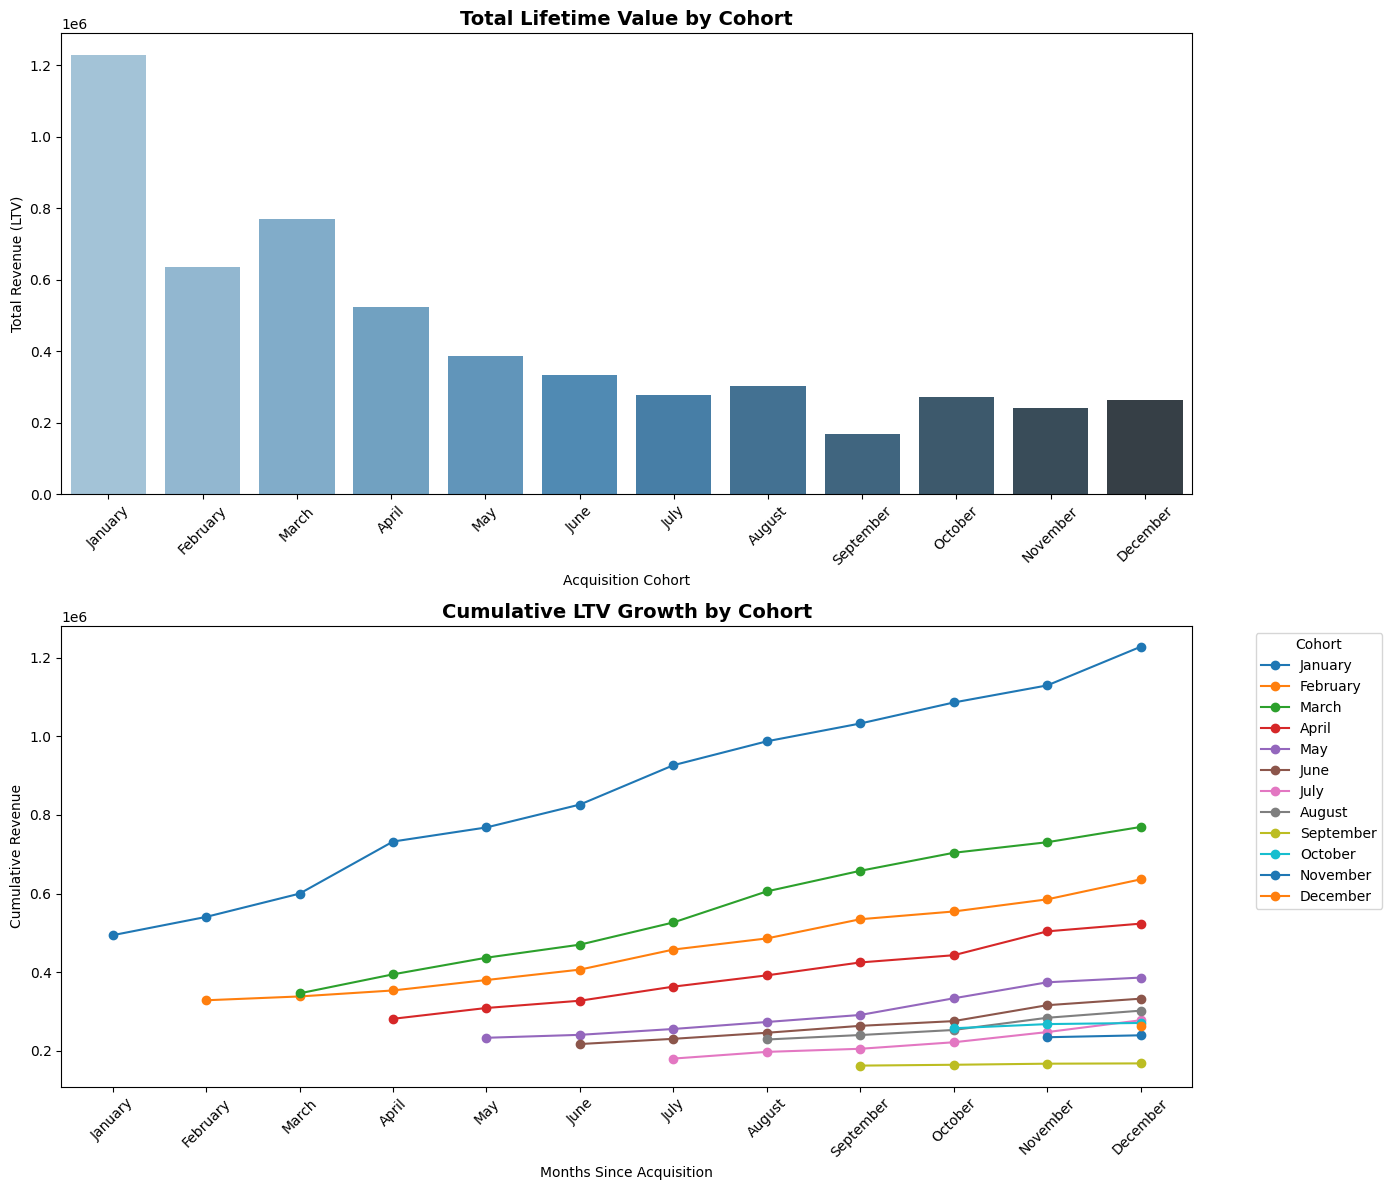

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare LTV Data
ltv_df = revenue_matrix[['Total_LTV']].reset_index()

# Prepare Cumulative Revenue Data
cumulative_revenue = revenue_matrix.drop(columns='Total_LTV').cumsum(axis=1)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14,12))

# --- Plot 1: Bar chart (Total LTV per Cohort) ---
sns.barplot(data=ltv_df, x="Cohort_Month", y="Total_LTV", palette="Blues_d", ax=axes[0])
axes[0].set_title("Total Lifetime Value by Cohort", fontsize=14, weight="bold")
axes[0].set_ylabel("Total Revenue (LTV)")
axes[0].set_xlabel("Acquisition Cohort")
axes[0].tick_params(axis='x', rotation=45)

# --- Plot 2: Line chart (Cumulative LTV growth) ---
for cohort in cumulative_revenue.index:
    axes[1].plot(cumulative_revenue.columns, cumulative_revenue.loc[cohort], marker='o', label=cohort)

axes[1].set_title("Cumulative LTV Growth by Cohort", fontsize=14, weight="bold")
axes[1].set_ylabel("Cumulative Revenue")
axes[1].set_xlabel("Months Since Acquisition")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Cohort", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


### Findings
- **Highest LTV Cohorts:**
  - **January:** ~1.23M total revenue → largest contributor due to both size and sustained repeat purchases.  
  - **March:** ~769K total revenue → strong cumulative growth with consistent monthly contributions.  
  - **February:** ~636K total revenue → mid-level cohort, strong early revenue but less sustained growth than March.  

- **Moderate Cohorts:**
  - **April–June:** Each cohort generated ~330K–520K revenue. They show decent early engagement but taper off after 2–3 months.  

- **Lowest LTV Cohorts:**
  - **Late Cohorts (Sep–Dec):**  
    - September ~168K, October ~271K, November ~240K, December ~263K.  
    - Much lower lifetime value due to weaker retention and limited time window to contribute.  

---

### Insights
- **Early-year cohorts (Jan–Mar)** bring the **highest lifetime value**, likely due to better onboarding, product mix, or seasonal marketing.  
- **Mid-year cohorts (Apr–Jun)** contribute moderately, but show signs of early drop-offs → retention can be improved.  
- **Late-year cohorts (Sep–Dec)** have significantly lower LTV, suggesting either weaker acquisition quality or insufficient time to realize long-term value.  

---

### Strategic Implications
1. **Acquisition Cost Alignment (CAC):**
   - Willing to spend more on customer acquisition in **high-LTV months (Jan–Mar)** since payback is stronger.  
   - Reduce or optimize acquisition spend in weaker months (Sep–Dec) to avoid overspending on low-return cohorts.  

2. **Retention Investments:**
   - Focus retention campaigns on **mid-year cohorts (Apr–Jun)** where LTV is moderate but can be lifted with better engagement.  
   - Design **early re-engagement triggers** (e.g., post-purchase offers, loyalty perks) within the first 2 months.  

3. **Seasonal Budget Allocation:**
   - Allocate higher marketing resources and campaigns during **early-year acquisition** when customers tend to have higher long-term value.  
   - In late-year months, prioritize **nurturing existing customers** over aggressive acquisition pushes.  


#### <font color='Red'>14. Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue? </font>

In [84]:
online_sales = pd.merge(online_sales,customers,on='CustomerID',how='left')

In [85]:
category_monthly_sales = online_sales.groupby(['Month','Product_Category']).agg(Quantity = ('Quantity',\
        lambda x: x.sum()),Revenue = ('Invoice_Value',lambda x: round(x.sum(),2))).reset_index()
category_monthly_sales.head(2)

,Month,Product_Category,Quantity,Revenue
0,January,Accessories,1.0,63.23
1,January,Android,4.0,103.13


In [86]:
location_monthly_sales = online_sales.groupby(['Month','Location']).agg(Quantity = ('Quantity', \
        lambda x: x.sum()),Revenue = ('Invoice_Value',lambda x: round(x.sum(),2))).reset_index()
location_monthly_sales.head()

,Month,Location,Quantity,Revenue
0,January,California,8885,187726.07
1,January,Chicago,3627,130705.16
2,January,New Jersey,1883,37917.95
3,January,New York,4284,96583.34
4,January,Washington DC,1461,41158.03


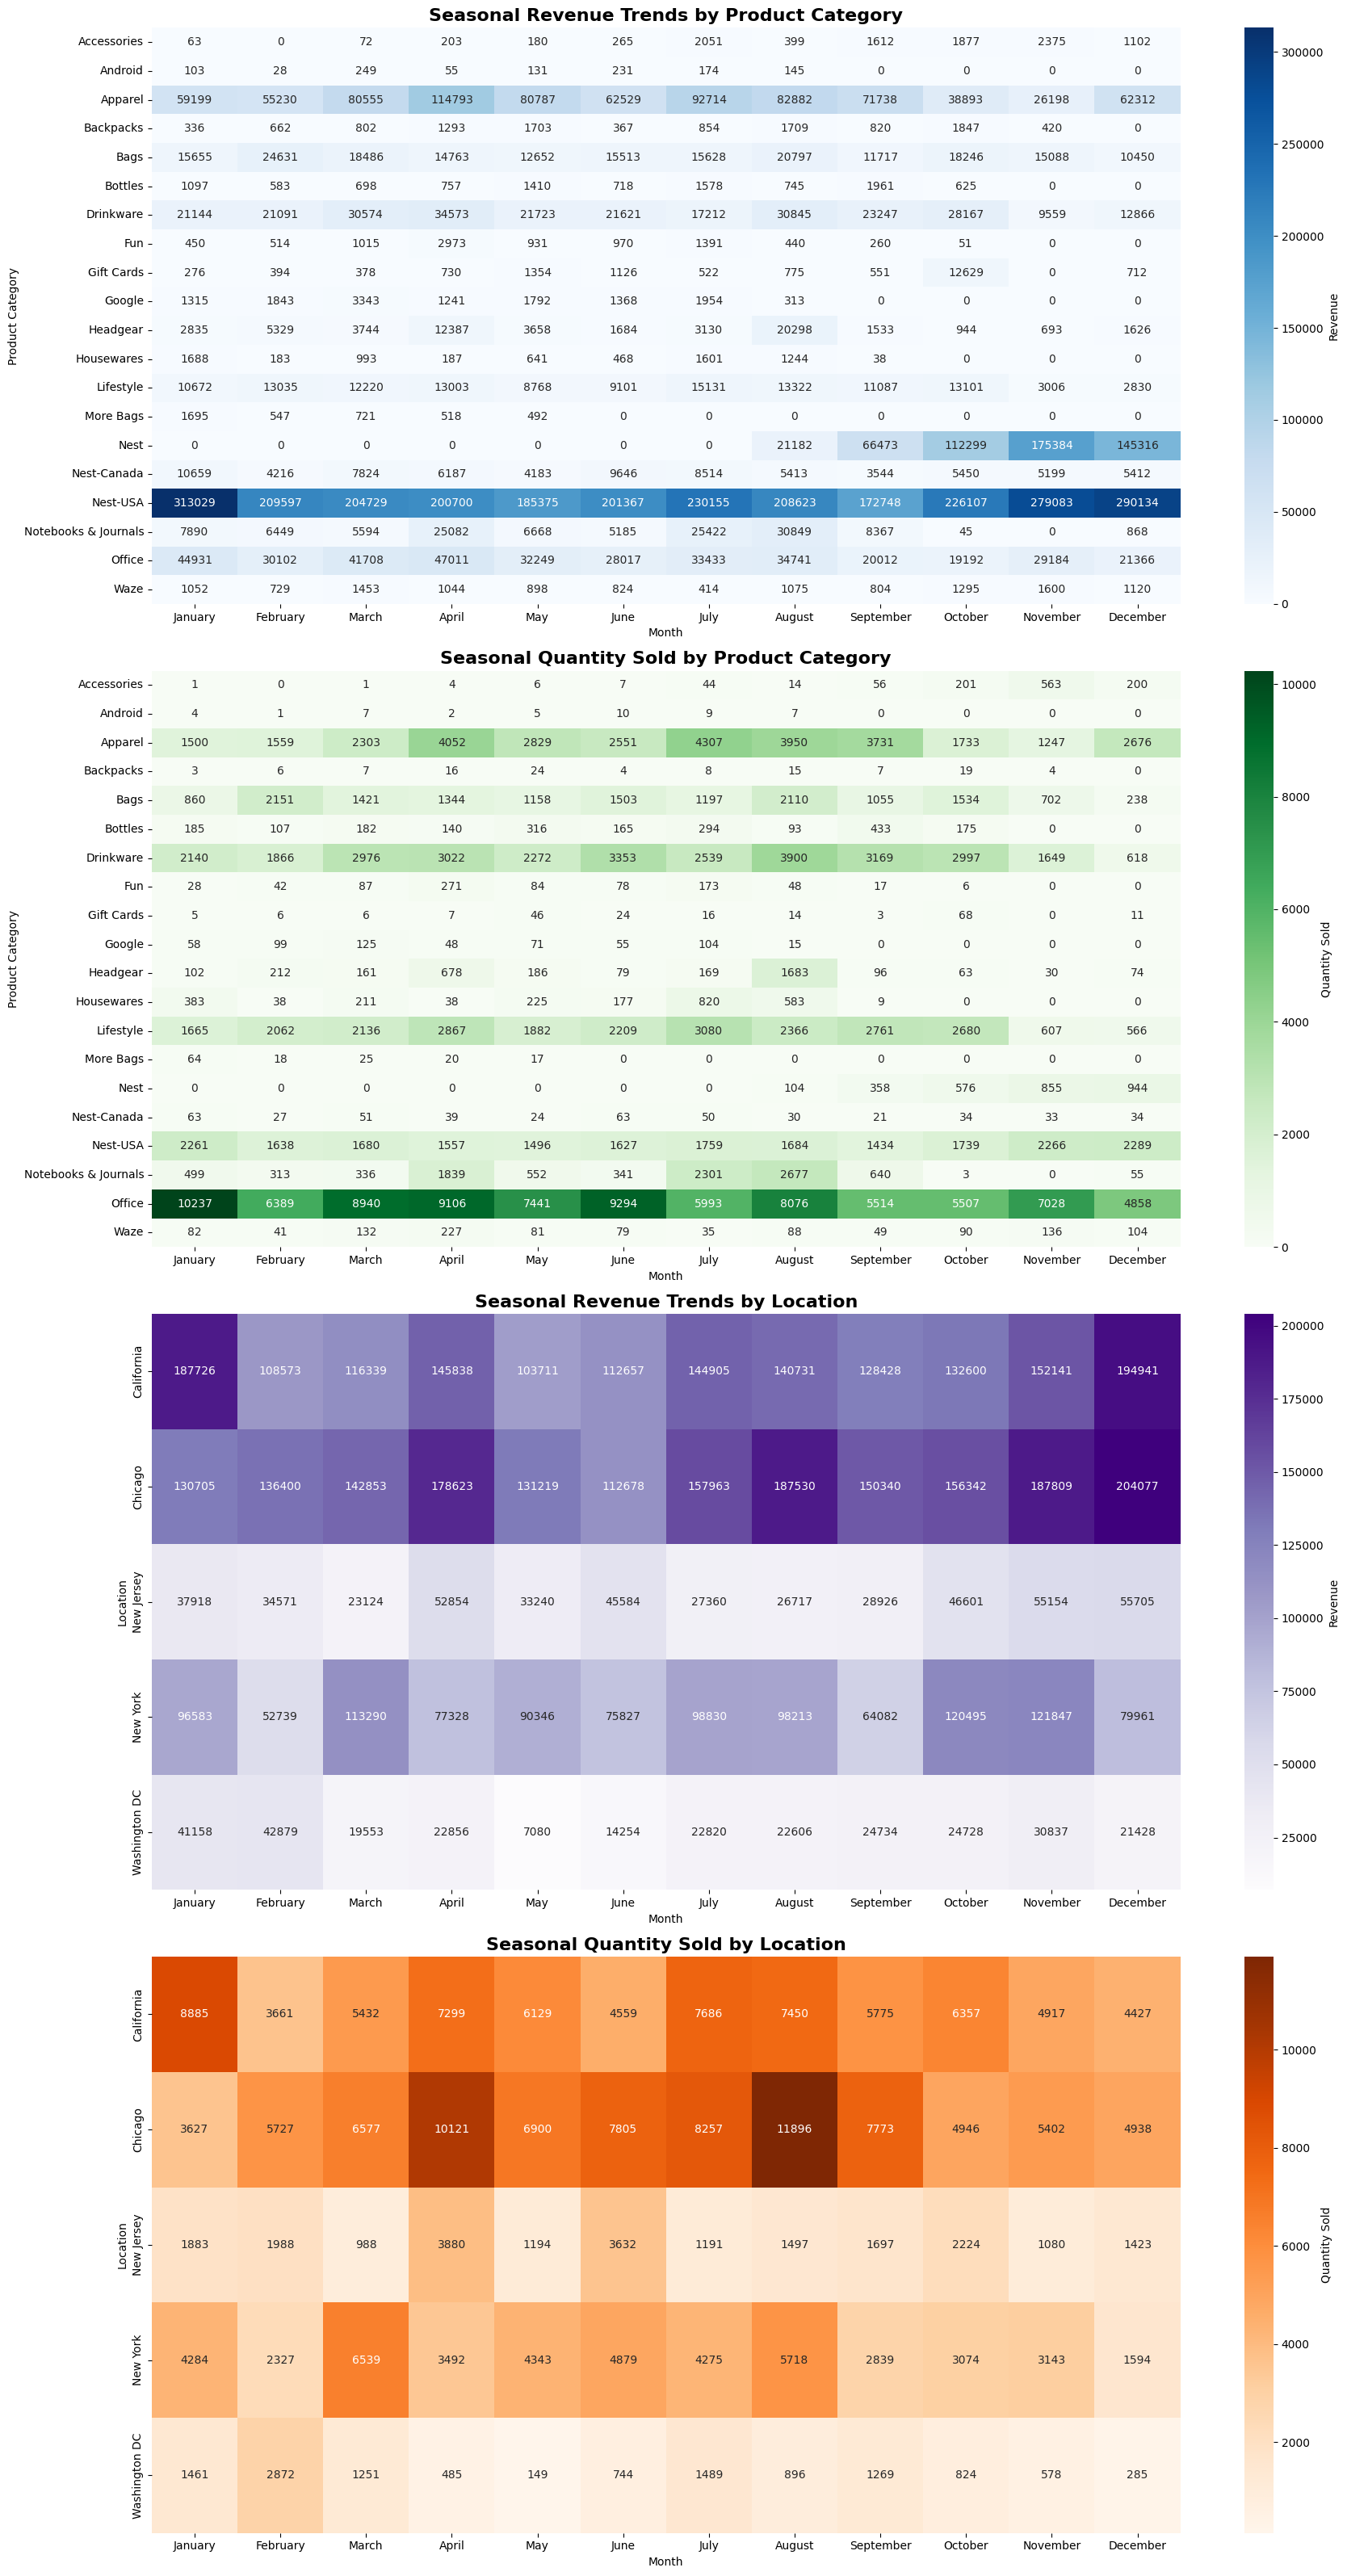

In [87]:

# Step 1: Create category-level pivot tables
revenue_heatmap_data_cat = category_monthly_sales.pivot_table(
    index="Product_Category",
    columns="Month",
    values="Revenue",
    aggfunc="sum"
).fillna(0)

quantity_heatmap_data_cat = category_monthly_sales.pivot_table(
    index="Product_Category",
    columns="Month",
    values="Quantity",
    aggfunc="sum"
).fillna(0)

# Step 2: Create location-level pivot tables
revenue_heatmap_data_loc = location_monthly_sales.pivot_table(
    index="Location",
    columns="Month",
    values="Revenue",
    aggfunc="sum"
).fillna(0)

quantity_heatmap_data_loc = location_monthly_sales.pivot_table(
    index="Location",
    columns="Month",
    values="Quantity",
    aggfunc="sum"
).fillna(0)


# Step 4: Plot heatmaps one after the other
fig, axes = plt.subplots(4, 1, figsize=(18, 32))

# --- Category Revenue ---
sns.heatmap(
    revenue_heatmap_data_cat, cmap="Blues", annot=True, fmt=".0f",
    cbar_kws={'label': 'Revenue'}, ax=axes[0]
)
axes[0].set_title("Seasonal Revenue Trends by Product Category", fontsize=16, weight="bold")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Product Category")

# --- Category Quantity ---
sns.heatmap(
    quantity_heatmap_data_cat, cmap="Greens", annot=True, fmt=".0f",
    cbar_kws={'label': 'Quantity Sold'}, ax=axes[1]
)
axes[1].set_title("Seasonal Quantity Sold by Product Category", fontsize=16, weight="bold")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Product Category")

# --- Location Revenue ---
sns.heatmap(
    revenue_heatmap_data_loc, cmap="Purples", annot=True, fmt=".0f",
    cbar_kws={'label': 'Revenue'}, ax=axes[2]
)
axes[2].set_title("Seasonal Revenue Trends by Location", fontsize=16, weight="bold")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Location")

# --- Location Quantity ---
sns.heatmap(
    quantity_heatmap_data_loc, cmap="Oranges", annot=True, fmt=".0f",
    cbar_kws={'label': 'Quantity Sold'}, ax=axes[3]
)
axes[3].set_title("Seasonal Quantity Sold by Location", fontsize=16, weight="bold")
axes[3].set_xlabel("Month")
axes[3].set_ylabel("Location")

plt.tight_layout()
plt.show()





### Key seasonal patterns
- **Apparel**
  - **Highest revenue & volume:** strong all-year presence with **major peaks in April, March and July/August** (biggest unit spikes in Apr, Jul, Aug).  

- **Nest / Nest-USA (premium electronics)**
  - **Revenue peaks:** huge dollar peaks in **Jan** and very strong late-year (Oct–Dec).  
  - **Quantity peaks:** concentrated in **Nov–Dec** (holiday buying) and Aug–Oct.  

- **Office & Drinkware**
  - **Office:** fairly steady revenue with noticeable bumps in **Apr, Jul–Aug**.  
  - **Drinkware:** peaks in **Mar–Apr** and **Aug–Oct** (volume and revenue both show seasonal lifts).

- **Smaller categories**
  - Some categories (Headgear, Notebooks & Journals, Bottles) show **sharp month-specific spikes**.

- **By location**
  - **California & Chicago** are the largest revenue markets overall.  
  - **California:** high revenue in **Jan and Dec** (strong holiday/early-year sales).  
  - **Chicago:** strong across mid/late year with peaks in **Aug and Dec**.  
  - **New Jersey / New York / Washington DC:** smaller but show local peaks (Nov/Dec for New Jersey & New York).

---

### Strategies to prepare for peak vs off-peak

**Inventory & supply**
- **Raise safety stock 6–8 weeks before known peaks:**  
  - Apparel → prepare for **Mar–Apr** and **Jul–Sep**.  
  - Nest / Nest-USA → ramp ahead of **Oct–Dec** (holiday) and **Jan** (post-holiday / new year campaigns).  
- **Keep replenishment flexible for fast-selling items**:
  - For categories with steady high demand (Apparel, Drinkware, Office), place smaller but more frequent orders instead of one large shipment. This avoids tying up cash in excess stock while still covering demand.
- **Secure supply for big-ticket items early**:
  - For high-value categories like Nest (electronics), negotiate priority supply with vendors and confirm lead times well before peak months. This reduces the risk of stockouts during the holiday surge.

**Promotions & pricing**
- **Avoid heavy discounting in natural peak months** (e.g., Nest in Nov–Dec): instead use bundles or upsell to protect margin.  
- **Run demand-stimulating promos in off-peak months:** time-limited offers for categories that dip (e.g., Apparel in Oct–Nov) to smooth revenue.  
- **Targeted coupons for weaker locations/months:** small, personalized discounts to reactivate low-season buyers.

**Marketing & channel mix**
- **Allocate more acquisition budget in months that historically yield higher LTV (Jan–Mar)** and shift to retention/upsell budget in late year.  
- **Location-targeted campaigns:** push Nest promotions to California & Chicago earlier; focus Apparel ads nationwide but intensify in months with high conversion.  
- **Coordinate marketing with inventory:** only promote Products that you can supply without stockouts.

#### <font color = 'Red'>15. Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days? </font>

In [88]:
daily_sales = online_sales.groupby(['Transaction_Date'])['Invoice_Value'].sum().reset_index(name='Sales')
daily_sales['Day'] = daily_sales['Transaction_Date'].dt.dayofyear
daily_sales['Month'] = daily_sales['Transaction_Date'].dt.month
daily_sales.head(2)

,Transaction_Date,Sales,Day,Month
0,2019-01-01,9039.42048,1,1
1,2019-01-02,15269.39436,2,1


In [89]:
high_performance_cutoff = daily_sales['Sales'].quantile(0.90)
low_performance_cutoff = daily_sales['Sales'].quantile(0.10)
print(low_performance_cutoff,high_performance_cutoff)

6739.607388 22924.86854400002


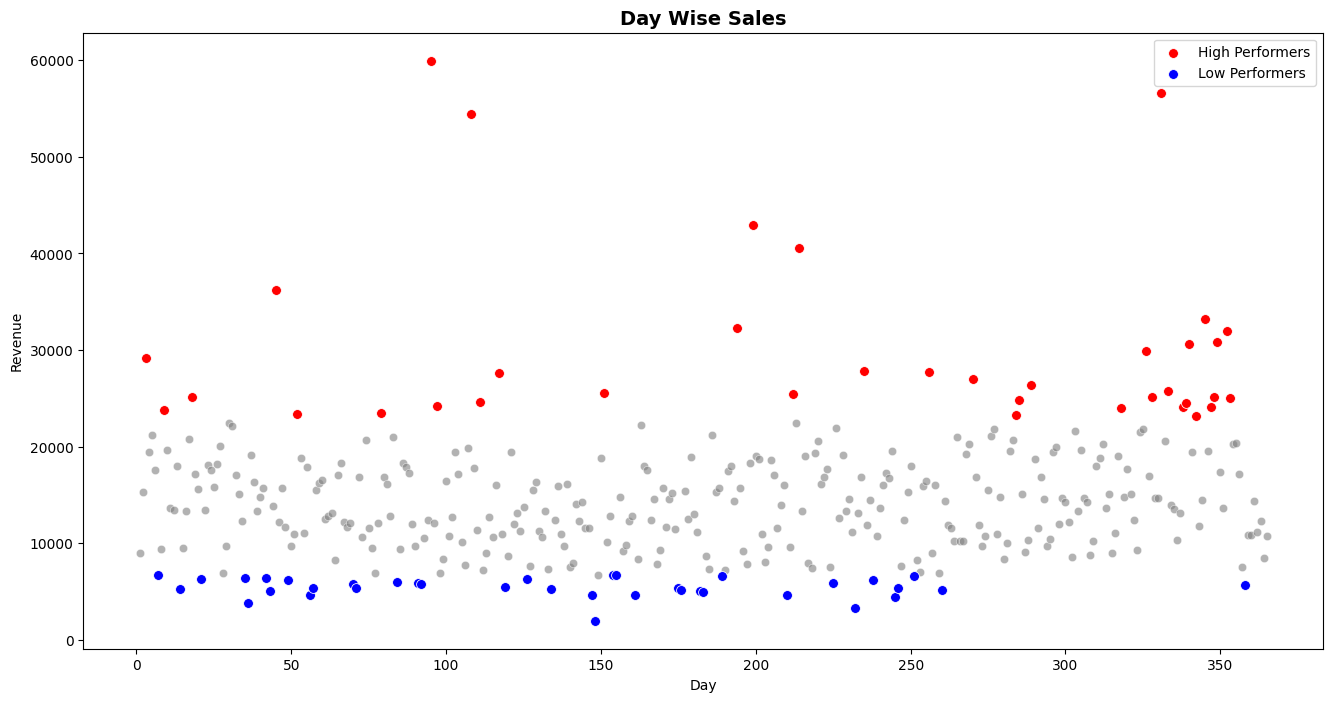

In [90]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=daily_sales, x="Day", y="Sales", color="gray", alpha=0.6)

# Highlight top performers
sns.scatterplot(data=daily_sales[daily_sales['Sales']>=high_performance_cutoff],\
                x="Day", y="Sales", color="red", s=50,label='High Performers')
# Highlight low performers
sns.scatterplot(data=daily_sales[daily_sales['Sales']<=low_performance_cutoff],\
                x="Day", y="Sales", color="blue", s=50,label='Low Performers')

plt.title("Day Wise Sales", fontsize=14, weight="bold")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.legend()

## Daily Sales Trend Analysis

### Observations

- **High-Performing Days:**  
  - Days marked in red show revenue spikes, often exceeding 25,000–60,000.
  - These peaks can be linked to marketing campaigns, holiday effects, or major promotions.
  - Most of the high perfroming days are in Q4.
- **Low-Performing Days:**  
  - Days in blue indicate consistently low sales, with revenue well below the 10%.
  - Grey dots represent average-performance days making up most of the year.

---

## Strategies to Boost Sales on Low-Performing Days

### 1. Time-Limited Promotions and Flash Sales  
Launch targeted flash sales or exclusive time-limited discounts on historically low-sales days to create urgency and increase conversion rates.

### 2. Personalized Engagement  
Send automated personalized emails or push notifications featuring recommended products, discounts, or cart reminders to users inactive on slow days.

### 3. Loyalty & Rewards Programs  
Offer double loyalty points, cashback, or special rewards for purchases made during off-peak days, encouraging repeat business.

### 4. Free Shipping or Bonus Gifts  
Introduce free shipping thresholds or small bonus products for orders placed on slow days to incentivize higher order values.

### 5. Product Launches & Restocks  
Schedule the launch of new products, limited-edition items, or popular product restocks on low-performing days to drive excitement and traffic.

### 7. Social Media & Influencer Drives  
Partner with influencers or run social media campaigns aimed at driving attention and special offers on targeted low-sales days.

### 8. Bundling and Cross-Selling  
Highlight product bundles, frequently bought together items, or cross-sell offers to increase average order value and boost overall sales.